In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from PIL import Image
import random, math, re, time, os, cv2, shutil, pandas

In [2]:
NUM_COLUMNAS = 200 # 200 siempre
NUM_TROZOS = 6
IMG_SIZE = 64

In [3]:
# Crear carpetas de las clases (dígitos)

training_directory = 'CAPTCHA-DATASET/Training'
validation_directory = 'CAPTCHA-DATASET/Validation'
testing_directory = 'CAPTCHA-DATASET/Testing'
 
"""for i in range(10): # 0 -> 9
    os.mkdir(f'{training_directory}/{i}')
    os.mkdir(f'{validation_directory}/{i}')
    os.mkdir(f'{testing_directory}/{i}')"""

"for i in range(10): # 0 -> 9\n    os.mkdir(f'{training_directory}/{i}')\n    os.mkdir(f'{validation_directory}/{i}')\n    os.mkdir(f'{testing_directory}/{i}')"

# Pruebas trocear label

In [34]:
archivoCSV = pandas.read_csv(filepath_or_buffer='train.csv', sep=',')

In [119]:
print(archivoCSV.iloc[0]['Id'])
print(archivoCSV.iloc[0]['Label'])
print(archivoCSV.iloc[155]['Label'])

0
24706
59249


In [80]:
n = 43365644
print([int(d) for d in str(n)])

n = 43365644
print([(n//(10**i))%10 for i in range(math.ceil(math.log(n, 10)), -1, -1)][not(re.match('10*', str(n))):])

[4, 3, 3, 6, 5, 6, 4, 4]
[4, 3, 3, 6, 5, 6, 4, 4]


In [79]:
label_prueba = archivoCSV.iloc[555]['Label']
print(label_prueba)
print([(label_prueba//(10**i))%10 for i in range(math.ceil(math.log(label_prueba, 10)), -1, -1)][not(re.match('10*', str(label_prueba))):])

75775
[7, 5, 7, 7, 5]


In [31]:
def trocear_labelV1(index: int):
    LABEL = archivoCSV.iloc[index]['Label']
    return [int(d) for d in str(LABEL)]

In [22]:
def trocear_labelV2(index: int):
    LABEL = archivoCSV.iloc[index]['Label']
    return [(LABEL//(10**i))%10 for i in range(math.ceil(math.log(LABEL, 10)), -1, -1)][not(re.match('10*', str(LABEL))):]

In [83]:
label_troceado = trocear_labelV1(999)
label_troceado

[7, 7, 9, 6, 4]

# Pruebas mostrar trozos de un captcha

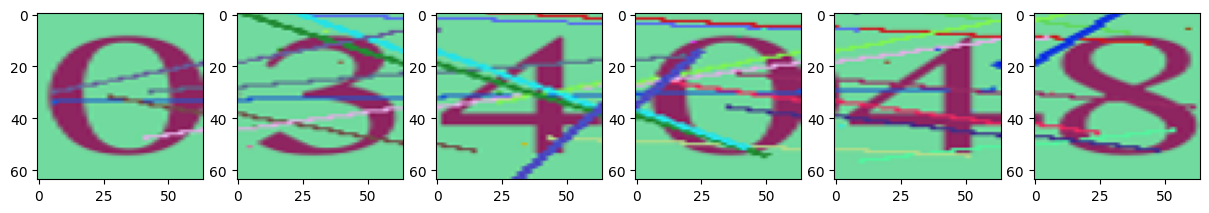

In [97]:
def MOSTRAR_cachitos_de_sushi(imagen: np.ndarray, num_trozos: int):
    lista_de_trocitos = []
    figura = plt.figure(figsize=(15,5))
    offset = int(NUM_COLUMNAS/num_trozos) # 200/6 = 33
    for trozo in range(num_trozos): 
        trozo_imagen = imagen[15:, trozo*offset:(trozo+1)*offset]
        trozo_imagen = Image.fromarray(trozo_imagen)
        trozo_imagen = trozo_imagen.resize(size=(IMG_SIZE,IMG_SIZE))
        trozo_imagen = np.array(trozo_imagen)
        figura.add_subplot(1,6,trozo+1)
        plt.imshow(trozo_imagen)
        lista_de_trocitos.append(trozo_imagen)
    plt.show()
    return lista_de_trocitos

imagen = Image.open('train/11484.png')
imagen = np.array(imagen)
cachos = MOSTRAR_cachitos_de_sushi(imagen=imagen, num_trozos=NUM_TROZOS)

# Pruebas trocear captcha

In [7]:
# imagen.shape[0]: filas
# imagen.shape[1]: columnas

def trocear_el_sushi(imagen: np.ndarray, num_trozos: int):
    lista_de_trocitos = []
    offset = int(NUM_COLUMNAS/num_trozos) # 200/6 = 33
    for trozo in range(num_trozos): 
        trozo_imagen = imagen[15:, trozo*offset:(trozo+1)*offset]
        trozo_imagen = Image.fromarray(trozo_imagen)
        trozo_imagen = trozo_imagen.resize(size=(IMG_SIZE,IMG_SIZE))
        trozo_imagen = np.array(trozo_imagen)
        lista_de_trocitos.append(trozo_imagen)
    return lista_de_trocitos

In [115]:
imagen = Image.open('train/00000.png')
imagen = np.array(imagen)
cachos = trocear_el_sushi(imagen=imagen, num_trozos=NUM_TROZOS)

# Pruebas vincular imagen con label del CSV

In [ ]:
# La idea es hacer un for que recorra la carpeta de imágenes y el .csv a la vez
# Se troceen ambas cosas a la vez y teniendo ambas listas, meter cada trozo de la imagen
# en una carpeta según su label 

In [146]:
for index, imagen in enumerate(os.listdir('train')):
    imagen = np.array(Image.open(f'train/{imagen}'))

    # Rellenar on '0' a la izquierda; cantidad: 6-len(trocear_labelV2(index))
    # Si el primero no es '0', se quita el primer sumando y fuera
    label_troceado = [0] * (6-len(trocear_labelV2(index))) + trocear_labelV2(index)
    imagen_troceada = trocear_el_sushi(imagen, NUM_TROZOS)

    print(index, label_troceado)
    if index == 10:
        break

0 [0, 2, 4, 7, 0, 6]
1 [0, 8, 0, 3, 4, 4]
2 [0, 7, 6, 9, 0, 7]
3 [0, 8, 3, 9, 4, 1]
4 [0, 0, 9, 4, 1, 1]
5 [0, 4, 2, 0, 8, 6]
6 [0, 3, 8, 4, 0, 7]
7 [0, 5, 8, 9, 8, 6]
8 [0, 0, 4, 8, 4, 1]
9 [0, 5, 6, 0, 0, 6]
10 [0, 2, 1, 4, 2, 8]


# Pruebas mandar cada trozo de un captcha a su carpeta

In [162]:
ruta_destino = 'CAPTCHA-DATASET/Training'

imagen = np.array(Image.open(f'train/00000.png'))

label_troceado = [0] * (6-len(trocear_labelV2(0))) + trocear_labelV2(0)
imagen_troceada = trocear_el_sushi(imagen, NUM_TROZOS) # lista de numpy

for index, digito in enumerate(label_troceado): # ej:[0, 2, 4, 7, 0, 6]
    # print(index, digito)
    imagen_troceada[index] = Image.fromarray(imagen_troceada[index]).save(f'{ruta_destino}/{digito}/imagen{index}.png')

# Mover GENÉRICO V3

In [4]:
def trocear_labelV3(csv_file: str, index: int): # 'file.csv'
    archivoCSV = pandas.read_csv(filepath_or_buffer=csv_file, sep=',')
    LABEL = archivoCSV.iloc[index]['Label']
    return [int(d) for d in str(LABEL)]

In [5]:
def trocear_el_sushiV3(imagen: np.ndarray, num_trozos: int):
    lista_de_trocitos = []
    offset = int(NUM_COLUMNAS/num_trozos) # 200/6 = 33
    for trozo in range(num_trozos): 
        trozo_imagen = imagen[15:, trozo*offset:(trozo+1)*offset]
        trozo_imagen = Image.fromarray(trozo_imagen)
        trozo_imagen = trozo_imagen.resize(size=(IMG_SIZE,IMG_SIZE))
        trozo_imagen = np.array(trozo_imagen)
        lista_de_trocitos.append(trozo_imagen)
    return lista_de_trocitos

In [6]:
def repartir_trozos_a_carpetasV3(labels: list[int], trozos: list[np.ndarray], index_mega_lista: int, ruta: str, origin_directory: str):
    if origin_directory == 'train':
        marca = 'T'
    else: # 'validation'
        marca = 'V'
    for index, digito in enumerate(labels): # ej: [0, 2, 4, 7, 0, 6]
        trozos[index] = Image.fromarray(trozos[index]).save(f'{ruta}/{digito}/captcha{marca}_{index_mega_lista}_digito_nº{index+1}.png') 
        # ej: CAPTCHA-DATASET/Training/5/captcha_467_0.png

In [7]:
def repartir_captchasV3(destination_directory: str, csv_file: str, origin_directory: str):
    for index, imagen in enumerate(os.listdir(origin_directory)):
        imagen = np.array(Image.open(f'{origin_directory}/{imagen}'))

        label_troceado = trocear_labelV3(csv_file, index)
        label_troceado = [0] * (6-len(label_troceado)) + label_troceado
        imagen_troceada = trocear_el_sushiV3(imagen, NUM_TROZOS)

        # print(index, label_troceado)

        repartir_trozos_a_carpetasV3(labels=label_troceado, trozos=imagen_troceada, index_mega_lista=index, ruta=destination_directory, origin_directory=origin_directory)
        # if index==1:
        #     break

In [8]:
repartir_captchasV3(destination_directory=training_directory, csv_file='train.csv', origin_directory='train')
repartir_captchasV3(destination_directory=training_directory, csv_file='validation.csv', origin_directory='validation')
# 1.30 min aprox.

# Borrar todo el datset

In [69]:
ruta_destino = 'CAPTCHA-DATASET/Training'
for carpeta in os.listdir(ruta_destino):
    for imagen in os.listdir(f'{ruta_destino}/{carpeta}'):
        os.remove(f'{ruta_destino}/{carpeta}/{imagen}')

# Mover de Train a Val y Test y viceversa

In [82]:
directorio = "CAPTCHA-DATASET"

dir_train = f"{directorio}/Training"
dir_val = f"{directorio}/Validation"
dir_test = f"{directorio}/Testing"

lista_clases_train = os.listdir(dir_train)
lista_clases_val = os.listdir(dir_val)
lista_clases_test = os.listdir(dir_test)
#--------------------------------MOVER TODAS LAS FOTOS DE TESTING Y VALIDATION A TRAINING--------------------------------#
for i in range(len(lista_clases_train)):
    nombres_fotos_test = os.listdir(f'{dir_test}/{lista_clases_test[i]}')
    nombres_fotos_val = os.listdir(f'{dir_val}/{lista_clases_test[i]}')
    for foto_a_mover in nombres_fotos_test:
        shutil.move(src=f'{dir_test}/{lista_clases_test[i]}/{foto_a_mover}', dst=f'{dir_train}/{lista_clases_train[i]}')
    for foto_a_mover in nombres_fotos_val:
        shutil.move(src=f'{dir_val}/{lista_clases_test[i]}/{foto_a_mover}', dst=f'{dir_train}/{lista_clases_train[i]}')
print('TODO MOVIDO A TRAINING')
#--------------------------------MOVER TODAS LAS FOTOS DE TESTING Y VALIDATION A TRAINING--------------------------------#

#--------------------------------MOVER 10% FOTOS A TESTING Y 20% A VALIDATION--------------------------------#
for digito in lista_clases_train:
    nombres_fotos = os.listdir(f'{dir_train}/{digito}')
    cantidad_fotos_digito = len(nombres_fotos)

    diezmo = int(cantidad_fotos_digito * 0.1)
    diezmoX2 = int(cantidad_fotos_digito * 0.2)

    for i in range(diezmoX2): # para validación
        nombre_a_mover = nombres_fotos.pop(random.randrange(len(nombres_fotos))) 
        shutil.move(f'{dir_train}/{digito}/{nombre_a_mover}', f'{dir_val}/{digito}')
    for i in range(diezmo): # para test
        nombre_a_mover = nombres_fotos.pop(random.randrange(len(nombres_fotos))) 
        shutil.move(f'{dir_train}/{digito}/{nombre_a_mover}', f'{dir_test}/{digito}')
print('TODO MOVIDO A VALIDATION y TESTING')
#--------------------------------MOVER 10% FOTOS A TESTING Y 20% A VALIDATION--------------------------------#
# todo en menos de 20" 

TODO MOVIDO A TRAINING
TODO MOVIDO A VALIDATION y TESTING
